<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E6%A9%9F%E7%8E%87%E7%B5%B1%E8%A8%88/%E6%AD%A3%E6%85%8B%E5%88%86%E4%BD%881.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip install wget

In [2]:
import wget
#下載字型ChineseFont.ttf
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

### 使用numpy建立常態分佈的數據

In [3]:
import numpy as np

# 生成 5 個符合均值 0、標準差 1 的正態分佈數值
normal_data = np.random.normal(loc=0, scale=1, size=5)
print(normal_data)

[-1.77487166 -0.73579303  1.06320071 -0.93886669 -1.24118771]


## Q-Q 圖 (Quantile-Quantile Plot) 說明
Q-Q 圖是用來評估數據是否符合特定理論分佈的視覺化工具，最常用於檢驗數據是否呈常態分佈。

### 原理說明
#### 1. 基本概念

- Q-Q 圖將數據的分位數與理論分佈的分位數進行比較
- X軸代表理論分佈（在這裡是常態分佈）的分位數
- Y軸代表實際數據的分位數

#### 2. 判讀方式

- 如果點落在對角線上或接近對角線，表示數據符合理論分佈
- 點的分佈形態可以顯示偏離常態的方式：
- 彎曲：表示偏態
- 傾斜：表示變異數不同
- S形：表示尾部較重或較輕

樣本均值: -0.0043
理論均值: 0
樣本標準差: 1.0002
理論標準差: 1

Shapiro-Wilk 檢定結果:
p值: 0.7177
是否為常態分佈: True


/opt/conda/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


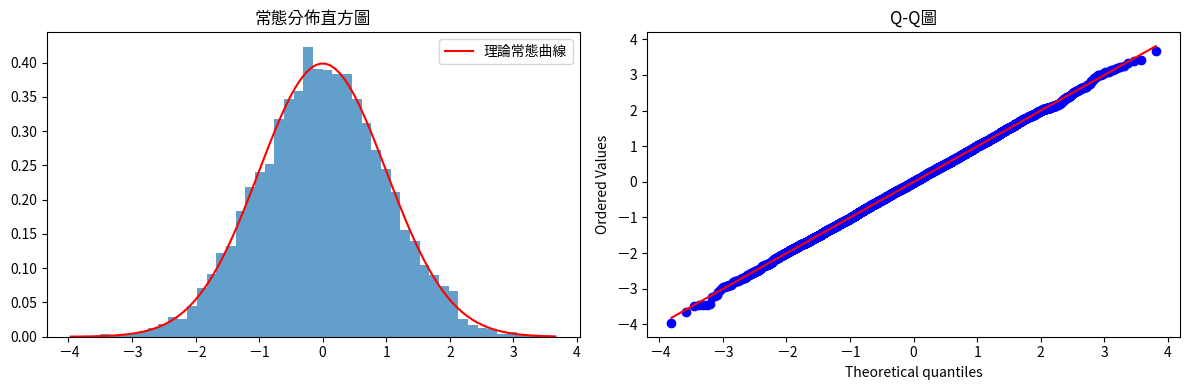

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

#中文字型
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")
# 為了得到更可靠的結果，我們需要更大的樣本量
sample_size = 10000
normal_data = np.random.normal(loc=0, scale=1, size=sample_size)

# 1. 驗證均值接近0
print(f"樣本均值: {np.mean(normal_data):.4f}")
print(f"理論均值: 0")

# 2. 驗證標準差接近1
print(f"樣本標準差: {np.std(normal_data):.4f}")
print(f"理論標準差: 1")

# 3. 進行常態性檢定
# 使用 Shapiro-Wilk 檢定，當p值>0.05時，表示數據符合常態分佈
statistic, p_value = stats.shapiro(normal_data)
print(f"\nShapiro-Wilk 檢定結果:")
print(f"p值: {p_value:.4f}")
print(f"是否為常態分佈: {p_value > 0.05}")

# 4. 視覺化檢查
plt.figure(figsize=(12, 4))

# 直方圖
plt.subplot(121)
plt.hist(normal_data, bins=50,density=True,alpha=0.7)
plt.title("常態分佈直方圖")

# 添加理論常態分佈曲線
x = np.linspace(min(normal_data), max(normal_data), 100)
plt.plot(x, stats.norm.pdf(x, loc=0, scale=1), 'r-', label='理論常態曲線')
plt.legend()

# Q-Q圖
# 說明1
plt.subplot(122)
stats.probplot(normal_data, dist="norm", plot=plt)
plt.title("Q-Q圖")

plt.tight_layout()
plt.show()

# 說明1
這段代碼是用於繪製正態分佈的Q-Q圖（Quantile-Quantile Plot）的視覺化分析。讓我為您解釋其主要組成部分：
首先，`plt.subplot(122)` 創建了一個子圖。這裡的參數 `122` 表示在 1 行 2 列的圖表布局中的第 2 個位置（右側）。這表明整個圖表布局包含兩個並排的子圖。

接著，`stats.probplot(normal_data, dist="norm", plot=plt)` 繪製了Q-Q圖。這個函數將數據 `normal_data` 與理論正態分佈進行比較：
- `normal_data` 是要分析的數據
- `dist="norm"` 指定要比較的理論分佈為正態分佈
- `plot=plt` 指示將圖形繪製到當前的 matplotlib 圖表中

`plt.title("Q-Q圖")` 為這個子圖添加了標題。

最後，`plt.tight_layout()` 自動調整子圖的佈局，確保圖表之間有適當的間距，並且標題、軸標籤等不會重疊。這個函數通過調整子圖之間的間距和邊距來優化整體佈局。

這種圖表組合常用於檢驗數據是否符合正態分佈。如果數據點大致落在Q-Q圖的對角線上，則表明數據近似服從正態分佈。